<h1> Лабораторная работа №1 </h1>
<h2> по теме: Разведочный анализ данных. Исследование и визуализация данных. </h2>
Цель лабораторной работы: изучение различных методов визуализация данных.

Для выполнения данной работы был выбран датасет 1000 * 8 содержащий статистику по баллам за три экзамена (math score - математика, writing score - письмо, reading score - чтение) в зависимости от 5 параметров: gender (пол), race/ethnicity - этническая принадлежность (в силу моральных принципов автора сета были поделены на Group A-E),parental level of education (уровень образования), lunch (стабильное питание) и test preparation course (подготовительные курсы).
Датасет представлен одним файлом data/StudentsPerformance.csv

<h3>1. Импорт библиотек и загрузка данных </h3>
Подключим необходимые библиотеки, такие как Pandas, Numpy и Seaborn с помощью команды import.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Используя read_csv() загрузим данные и проверим, выведя первые пять на экран командой head().

In [2]:
data = pd.read_csv('C:/jupWork/data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h3>2. Основные характеристики датасета </h3>

Основные параметры выборки можно получить командой describe(). Причина, почему в таблице только 3 параметра вместо 8 будут указаны ниже.

In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Для некоторых методов анализа наличие "пустых" ячеек критично. Поэтому важно сразу же проверить датасет на наличие параметров Null и либо удалить все подобные строки, либо самостоятельно заполнить их. В нашем случае таких ячеек нет.

In [4]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))


gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


Анализу можно подвергать не все параметры датасета сразу, а по отдельности. Ниже приведен пример анализа множества значений параметра gender и количества использований каждого.

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

<h3>3. Визуальный анализ датасета </h3>

1. Catplot
Самый простой и наглядный способ проанализировать выборку - построить на ее области диаграмму. За это в библиотеке Seaborn отвечает функция catplot. На том же примере с полом студенов:

Text(0.5, 1.0, 'Gender')

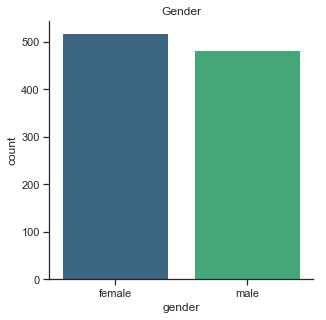

In [6]:
sns.catplot(x='gender',kind='count',data=data,height=4.5,palette='viridis')
plt.title('Gender')

Данная функция обладает множеством параметров для кастомизации гистограмм. Например введем еще один сортирующий параметр "test preparation course", и получим график распределения студентов по полу относительно факта прохождения подготовительных курсов:

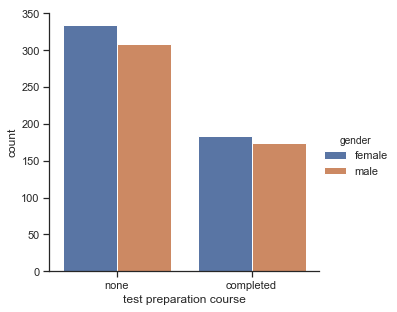

In [7]:
sns.catplot(x='test preparation course',
kind='count',data=data,height=4.5,hue='gender')

In [ ]:
Так же можно отсортировать порядок вывода, толщину столбцов и цветовую палитру.

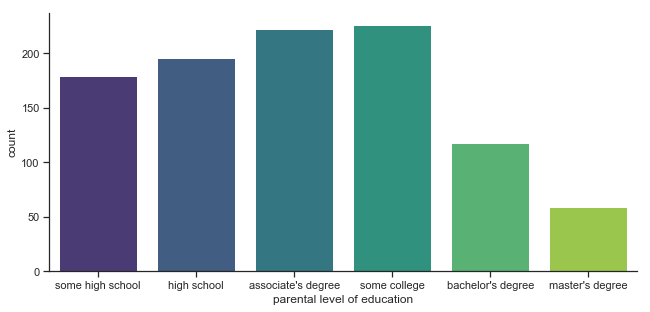

In [8]:
#data["race/ethnicity"].sort_values()
sns.catplot(x='parental level of education',kind='count',data=data,height=4.5,aspect=2,palette='viridis',
            order=["some high school","high school","associate's degree","some college",
                   "bachelor's degree","master's degree"],)

2. Subplots
Диаграмма рассеяния - точечная диаграмма показывающая зависимость значений. На данном примере по оси Х отложены значнея тестов по чтению, по У - по математике. Цветом выделены точки-записи относительно параметра lunch.

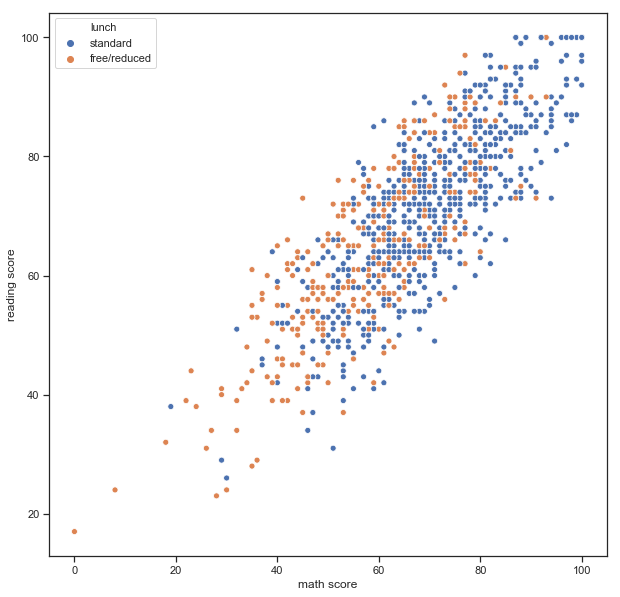

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='math score', y='reading score', data=data, hue='lunch')

3. Приведение данных
Одна из главных проблем анализа данных - их формат. В данной выборке все параметры кроме целевых, заданы текстовыми значениями. Для дальнейшего анализа необходимо перевести их в "цифру". Как это было сделано - показано ниже:

In [11]:
data['gender'].replace({'male':'1','female':'0'},inplace=True)
data['race/ethnicity'].replace({'group A':'1','group B':'2', 'group C':'3', 'group D':'4','group E':'5'},inplace=True)
data['lunch'].replace({'free/reduced':'0','standard':'1'},inplace=True)
data['test preparation course'].replace({'none':'0','completed':'1'},inplace=True)
data['parental level of education'].replace({'some high school':'1','high school':'1',"associate's degree":'2','some college':'3',"bachelor's degree":'4',"master's degree":'5'},inplace=True)

data['gender'] = data['gender'].astype('int64')
data['race/ethnicity'] = data['race/ethnicity'].astype('int64')
data['lunch'] = data['lunch'].astype('int64')
data['test preparation course'] = data['test preparation course'].astype('int64')
data['parental level of education'] = data['parental level of education'].astype('int64')

In [12]:
#посмотрим результат изменения значений
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,4,1,0,72,72,74
1,0,3,3,1,1,69,90,88
2,0,2,5,1,0,90,95,93
3,1,1,2,0,0,47,57,44
4,1,3,3,1,0,76,78,75


In [13]:
#убедимся что изменены не только значения, но и тип данных
data.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

4. Corr
Корреляционная матрица - главный инструмент при анализе взаимосвязей в большой выборке. Значения близкие по модулю к 1 означают высокую степень корреляции, т.е. высокую степень зависимости. Функция heatmap позволяет помимо построения матрицы выделить ячейки цветом - цветовая карта еще нагляднее показывает степень близости, облегчая визуальный анализ выборок с большим объемом параметров.

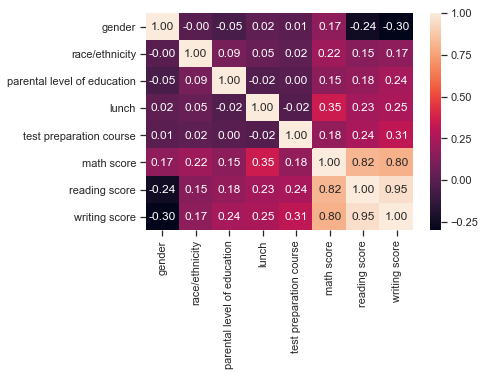

In [14]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

5. Pairplot
Данная команда строит матрицу N * N диаграмм формата "N-признак с N-ым".

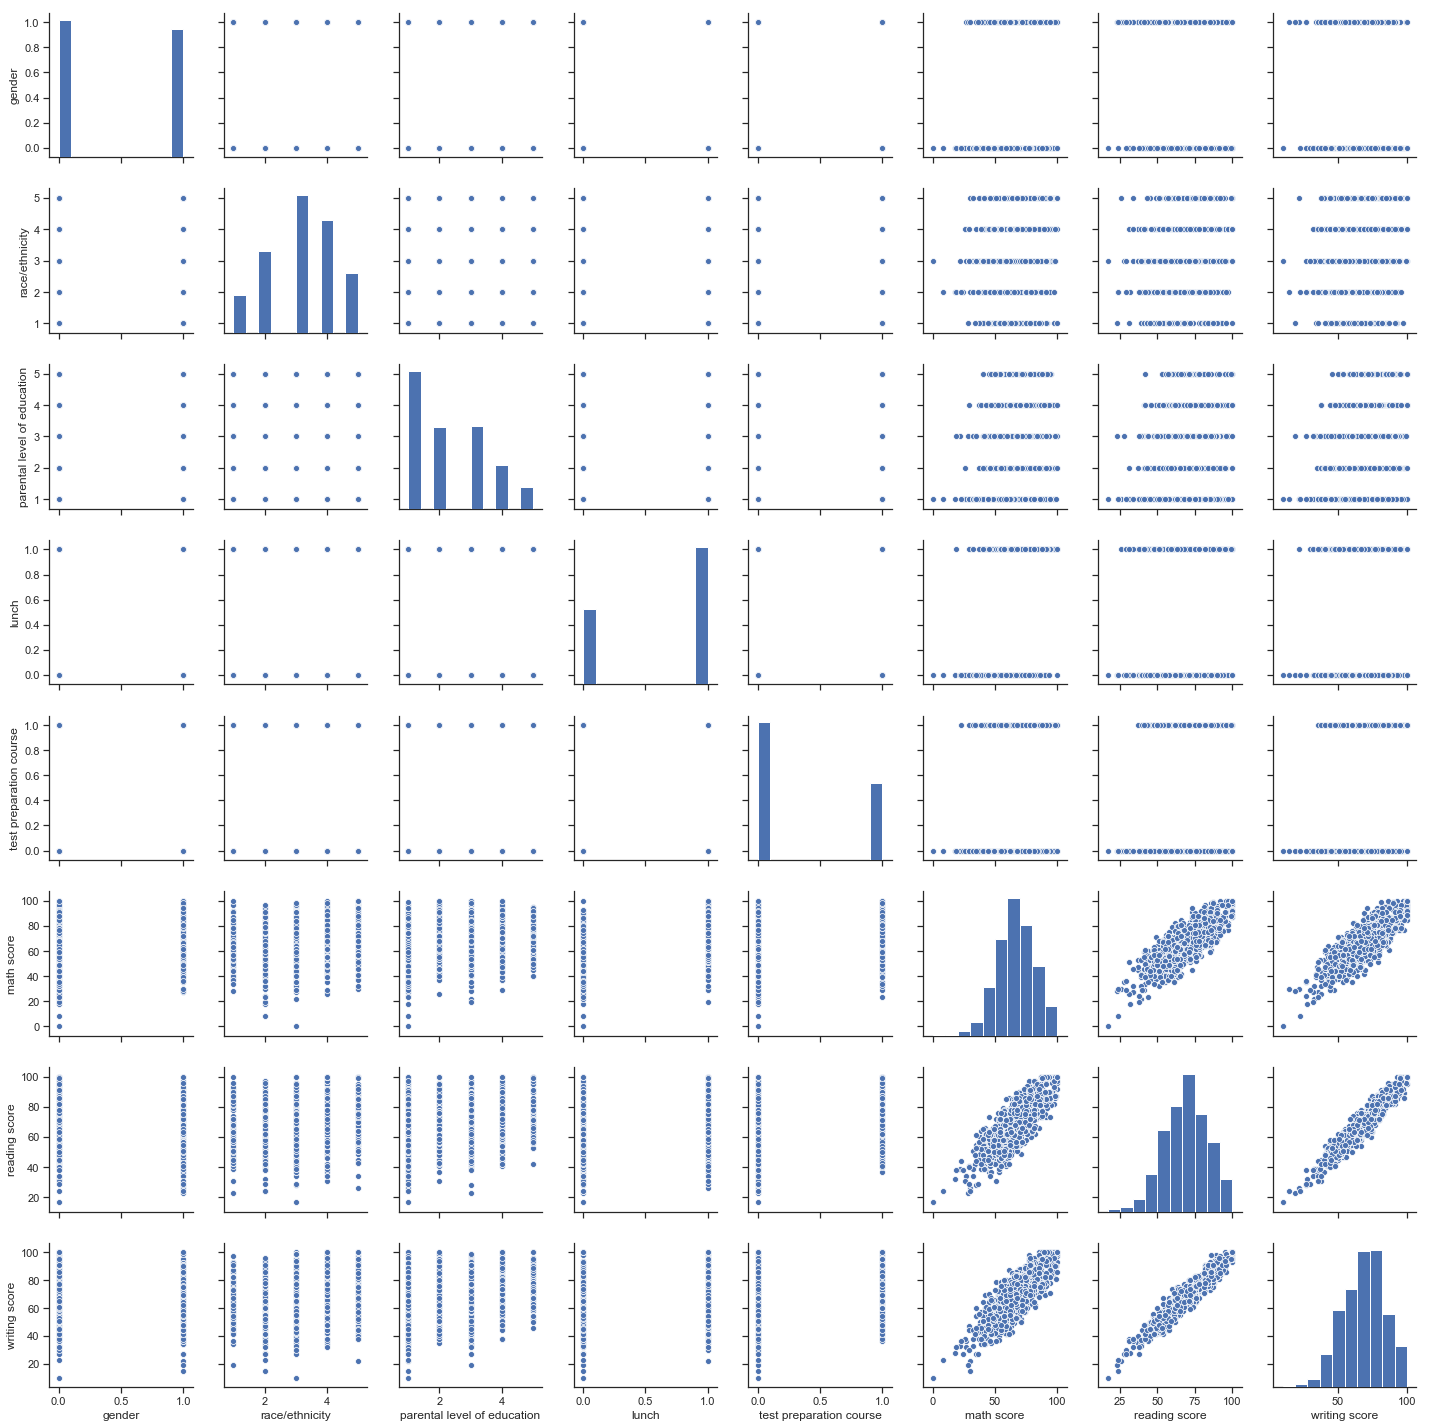

In [15]:
sns.pairplot(data)

6. Boxplot
"Ящик с усами" - своебразный тип диаграмм отображающий среднее значение и разброс параметра.

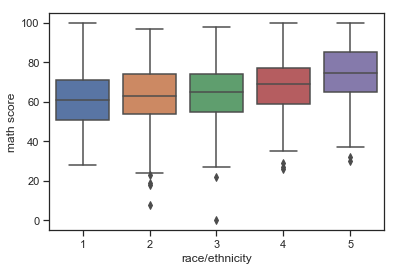

In [16]:
sns.boxplot(x=data['race/ethnicity'],y=data['math score'])

7. Violinplot
Еще одна диаграмма отображающая разброс значений параметра и его границы.

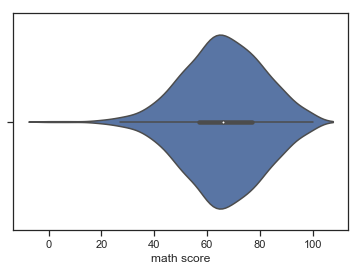

In [17]:
sns.violinplot(x=data['math score'])

8. Jointplot
Смесь из нескольких диаграмм. В зависимости от ключа kind зависит тип отрисовки. На данном примере нарисована карта глубины.

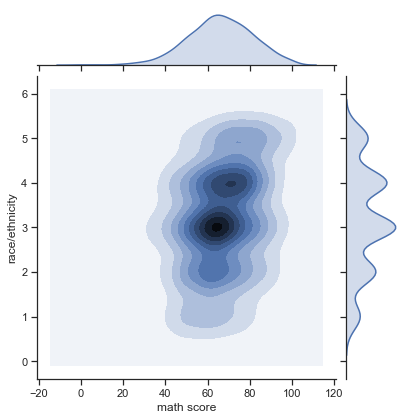

In [18]:
sns.jointplot(x='math score', y='race/ethnicity', data=data, kind="kde")

9. Distplot
Еще одна диаграмма отображающая распределение параметра.

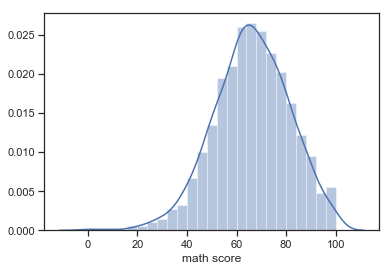

In [19]:
sns.distplot(data['math score'])

<h3>4. Результаты анализа </h3>

 Результаты анализа данного датасета оказались неоднозначны. Во-первых, не подтвердился миф о том что юношам лучше даются математические науки, а девушкам - гуманитарные. Во-вторых, от степени подготовки и прохождения дополнительных курсов прямой зависимости так же не наблюдается. Однако, студенты, успешно сдавшие один из экзаменов, так же хорошо сдают и остальные.